In [28]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

from keras import Sequential

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import tree
from colorama import Fore  #Colorama is a module to color the python outputs
from urllib.parse import urlparse

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

# 現在我們可以建立我們的模型。我們將使用一個簡單的LSTM模型。
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simhoz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('train_dataset.csv')
df.head(10)

,uid,website_links,anchor_url,request_url,email_submission,different_href_urls,right_click_disabled,popup_window_text_fields,iframe_redirection,favicon_external_domain,result
0,2000000000002925,1,1,1,1,-1,1,1,1,1,1
1,2000000000017433,1,1,1,1,-1,1,1,1,1,1
2,1613574528692723,1,1,0,1,-1,1,1,1,1,-1
3,1626621687765396,1,1,0,1,-1,1,1,1,1,-1
4,1613575926624924,1,1,0,1,-1,1,1,1,1,-1
5,2000000000006366,1,1,1,1,-1,1,1,1,1,1
6,1635704881469754,1,1,0,1,-1,1,1,1,1,-1
7,1635707621434936,1,1,0,1,-1,1,1,1,1,-1
8,1613575685829249,1,1,0,1,-1,1,1,1,1,-1
9,1613567605964981,1,1,0,1,-1,1,1,1,1,-1


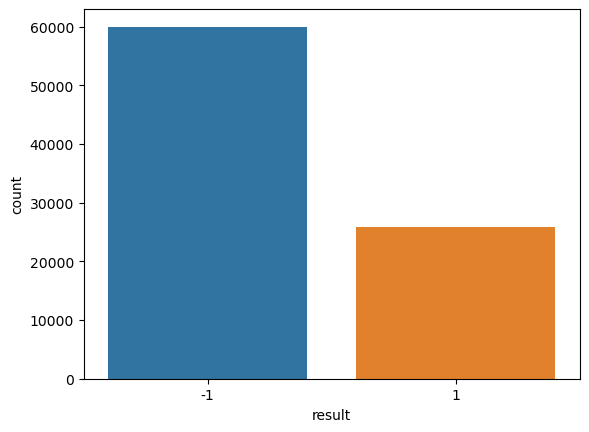

In [32]:
sns.countplot(x='result', data=df);

<AxesSubplot:>

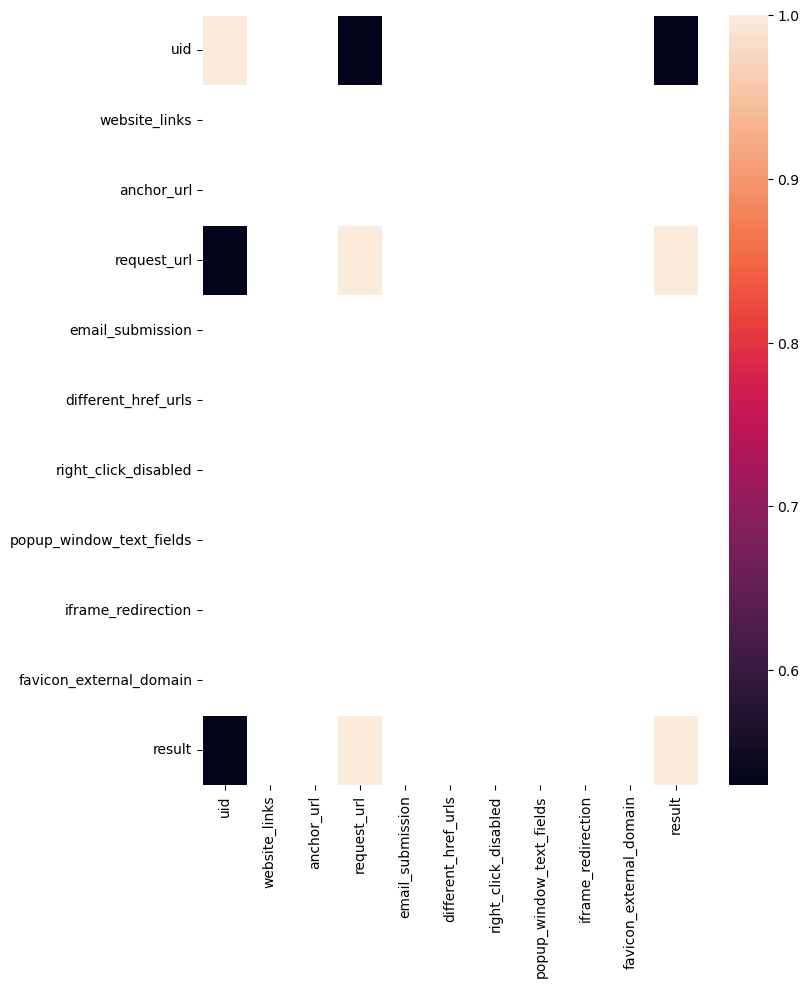

In [33]:
plt.figure(figsize=(8, 10))
sns.heatmap(df.corr(), linewidths=.5)

In [4]:
Y1 = df['result']
X1 = df.drop(columns = ['uid','result'])

In [45]:
Y1

0        1
1        1
2       -1
3       -1
4       -1
        ..
85916   -1
85917   -1
85918   -1
85919   -1
85920   -1
Name: result, Length: 85921, dtype: int64

In [5]:
X1.head(2)

,website_links,anchor_url,request_url,email_submission,different_href_urls,right_click_disabled,popup_window_text_fields,iframe_redirection,favicon_external_domain
0,1,1,1,1,-1,1,1,1,1
1,1,1,1,1,-1,1,1,1,1


In [44]:
Y1.head(4)

0    1
1    1
2   -1
3   -1
Name: result, dtype: int64

In [8]:
#data for learning without features 

X2 = df['uid']
X2.head(2)

0    2000000000002925
1    2000000000017433
Name: uid, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [10]:
X_train1 = np.expand_dims(X_train1, axis=-1)
X_test1 = np.expand_dims(X_test1, axis=-1)

X_train1.shape

(68736, 9, 1)

In [13]:
input_size1 = X_train1[1].shape
input_size1

(9, 1)

In [14]:
# Evaluation Helper Functions
def eval_graph(results):

    acc = results.history['accuracy']
    val_acc = results.history['val_accuracy']
    epochs = range(len(acc))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,acc,'r',label="Training Accuracy")
    plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH")
    plt.show()
    
    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(len(loss))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,loss,'r',label="Training loss")
    plt.plot(epochs,val_loss,'b',label="Validation loss")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH")
    plt.show()

In [15]:
def conf_matrix(X_test,Y_test,model):
    
    Y_pred = model.predict(X_test)
    Y_pred = Y_pred>0.5
    cm = confusion_matrix(Y_test,Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap = plt.cm.YlGn)
    plt.title('CONFUSION MATRIX')
    plt.show()

In [17]:
# CNN MODEL
def CNN(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_model1 = CNN(input_size1)
CNN_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 9, 16)             64        
                                                                 
 dropout_7 (Dropout)         (None, 9, 16)             0         
                                                                 
 batch_normalization_5 (Batc  (None, 9, 16)            64        
 hNormalization)                                                 
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 5, 16)            0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 5, 32)             1568      
                                                                 
 dropout_8 (Dropout)         (None, 5, 32)            

In [18]:
# CNN MODEL ON FIRST DATASET
CNN_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_results_1 = CNN_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
430/430 [==============================] - ETA: 0s - loss: -15618.3643 - accuracy: 0.1275
Epoch 1: val_loss improved from inf to -91387.52344, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 9s 15ms/step - loss: -15618.3643 - accuracy: 0.1275 - val_loss: -91387.5234 - val_accuracy: 0.0000e+00
Epoch 2/200
428/430 [============================>.] - ETA: 0s - loss: -241359.5000 - accuracy: 0.0051
Epoch 2: val_loss improved from -91387.52344 to -712958.31250, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 6s 13ms/step - loss: -242442.5000 - accuracy: 0.0050 - val_loss: -712958.3125 - val_accuracy: 0.0000e+00
Epoch 3/200
428/430 [============================>.] - ETA: 0s - loss: -1045995.3125 - accuracy: 0.0025
Epoch 3: val_loss improved from -712958.31250 to -2245902.75000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 6s 13ms/step - loss: -1

Epoch 23/200
428/430 [============================>.] - ETA: 0s - loss: -340931136.0000 - accuracy: 0.2962
Epoch 23: val_loss improved from -319661568.00000 to -359081792.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 7s 16ms/step - loss: -340951104.0000 - accuracy: 0.2962 - val_loss: -359081792.0000 - val_accuracy: 0.3075
Epoch 24/200
429/430 [============================>.] - ETA: 0s - loss: -379512064.0000 - accuracy: 0.2968
Epoch 24: val_loss improved from -359081792.00000 to -397256032.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 7s 16ms/step - loss: -379546368.0000 - accuracy: 0.2968 - val_loss: -397256032.0000 - val_accuracy: 0.3075
Epoch 25/200
430/430 [==============================] - ETA: 0s - loss: -420547776.0000 - accuracy: 0.2975
Epoch 25: val_loss improved from -397256032.00000 to -440789728.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [=======

430/430 [==============================] - 6s 14ms/step - loss: -1778085888.0000 - accuracy: 0.2885 - val_loss: -1823018880.0000 - val_accuracy: 0.3075
Epoch 45/200
426/430 [============================>.] - ETA: 0s - loss: -1883784064.0000 - accuracy: 0.2875
Epoch 45: val_loss improved from -1823018880.00000 to -1917215488.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 6s 14ms/step - loss: -1884481408.0000 - accuracy: 0.2873 - val_loss: -1917215488.0000 - val_accuracy: 0.3075
Epoch 46/200
427/430 [============================>.] - ETA: 0s - loss: -1995401600.0000 - accuracy: 0.2867
Epoch 46: val_loss improved from -1917215488.00000 to -2042919296.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 6s 13ms/step - loss: -1995808512.0000 - accuracy: 0.2866 - val_loss: -2042919296.0000 - val_accuracy: 0.3075
Epoch 47/200
426/430 [============================>.] - ETA: 0s - loss: -210936473

Epoch 66/200
429/430 [============================>.] - ETA: 0s - loss: -5142258176.0000 - accuracy: 0.2755
Epoch 66: val_loss improved from -5014615040.00000 to -5215880704.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 7s 16ms/step - loss: -5142560256.0000 - accuracy: 0.2755 - val_loss: -5215880704.0000 - val_accuracy: 0.3075
Epoch 67/200
429/430 [============================>.] - ETA: 0s - loss: -5352326656.0000 - accuracy: 0.2740
Epoch 67: val_loss improved from -5215880704.00000 to -5447677952.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 7s 15ms/step - loss: -5352012288.0000 - accuracy: 0.2739 - val_loss: -5447677952.0000 - val_accuracy: 0.3075
Epoch 68/200
430/430 [==============================] - ETA: 0s - loss: -5565797888.0000 - accuracy: 0.2719
Epoch 68: val_loss improved from -5447677952.00000 to -5659364352.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430

430/430 [==============================] - 7s 16ms/step - loss: -10765665280.0000 - accuracy: 0.2636 - val_loss: -10852842496.0000 - val_accuracy: 0.3075
Epoch 88/200
428/430 [============================>.] - ETA: 0s - loss: -11099907072.0000 - accuracy: 0.2592
Epoch 88: val_loss improved from -10852842496.00000 to -11247151104.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 6s 15ms/step - loss: -11100810240.0000 - accuracy: 0.2592 - val_loss: -11247151104.0000 - val_accuracy: 0.3075
Epoch 89/200
427/430 [============================>.] - ETA: 0s - loss: -11445571584.0000 - accuracy: 0.2595
Epoch 89: val_loss improved from -11247151104.00000 to -11555505152.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 7s 15ms/step - loss: -11447901184.0000 - accuracy: 0.2595 - val_loss: -11555505152.0000 - val_accuracy: 0.3075
Epoch 90/200
427/430 [============================>.] - ETA: 0s - loss

430/430 [==============================] - 7s 16ms/step - loss: -19360153600.0000 - accuracy: 0.2578 - val_loss: -19496323072.0000 - val_accuracy: 0.0000e+00
Epoch 109/200
430/430 [==============================] - ETA: 0s - loss: -19846445056.0000 - accuracy: 0.2564
Epoch 109: val_loss improved from -19496323072.00000 to -20007204864.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 7s 17ms/step - loss: -19846445056.0000 - accuracy: 0.2564 - val_loss: -20007204864.0000 - val_accuracy: 0.0000e+00
Epoch 110/200
429/430 [============================>.] - ETA: 0s - loss: -20342401024.0000 - accuracy: 0.2546
Epoch 110: val_loss improved from -20007204864.00000 to -20493254656.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 8s 18ms/step - loss: -20343353344.0000 - accuracy: 0.2546 - val_loss: -20493254656.0000 - val_accuracy: 0.0000e+00
Epoch 111/200
427/430 [============================>.]

430/430 [==============================] - 7s 16ms/step - loss: -31530543104.0000 - accuracy: 0.2565 - val_loss: -31718246400.0000 - val_accuracy: 0.0000e+00
Epoch 130/200
428/430 [============================>.] - ETA: 0s - loss: -32208646144.0000 - accuracy: 0.2591
Epoch 130: val_loss improved from -31718246400.00000 to -32281042944.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 7s 16ms/step - loss: -32211869696.0000 - accuracy: 0.2589 - val_loss: -32281042944.0000 - val_accuracy: 0.0000e+00
Epoch 131/200
427/430 [============================>.] - ETA: 0s - loss: -32874459136.0000 - accuracy: 0.2609
Epoch 131: val_loss improved from -32281042944.00000 to -32942852096.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 6s 15ms/step - loss: -32879228928.0000 - accuracy: 0.2607 - val_loss: -32942852096.0000 - val_accuracy: 0.0000e+00
Epoch 132/200
429/430 [============================>.]

430/430 [==============================] - 7s 16ms/step - loss: -47823867904.0000 - accuracy: 0.2551 - val_loss: -48100958208.0000 - val_accuracy: 0.0000e+00
Epoch 151/200
429/430 [============================>.] - ETA: 0s - loss: -48697880576.0000 - accuracy: 0.2562
Epoch 151: val_loss improved from -48100958208.00000 to -48883265536.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 6s 15ms/step - loss: -48700497920.0000 - accuracy: 0.2562 - val_loss: -48883265536.0000 - val_accuracy: 0.0000e+00
Epoch 152/200
430/430 [==============================] - ETA: 0s - loss: -49617731584.0000 - accuracy: 0.2566
Epoch 152: val_loss improved from -48883265536.00000 to -49844670464.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 7s 16ms/step - loss: -49617731584.0000 - accuracy: 0.2566 - val_loss: -49844670464.0000 - val_accuracy: 0.0000e+00
Epoch 153/200
428/430 [============================>.]

430/430 [==============================] - 6s 15ms/step - loss: -68900593664.0000 - accuracy: 0.2609 - val_loss: -68907876352.0000 - val_accuracy: 0.0000e+00
Epoch 172/200
427/430 [============================>.] - ETA: 0s - loss: -70010609664.0000 - accuracy: 0.2590
Epoch 172: val_loss improved from -68907876352.00000 to -70129336320.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 6s 14ms/step - loss: -70014140416.0000 - accuracy: 0.2591 - val_loss: -70129336320.0000 - val_accuracy: 0.0000e+00
Epoch 173/200
427/430 [============================>.] - ETA: 0s - loss: -71177945088.0000 - accuracy: 0.2584
Epoch 173: val_loss improved from -70129336320.00000 to -71249821696.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 6s 15ms/step - loss: -71176355840.0000 - accuracy: 0.2585 - val_loss: -71249821696.0000 - val_accuracy: 0.0000e+00
Epoch 174/200
429/430 [============================>.]

430/430 [==============================] - 7s 16ms/step - loss: -95279783936.0000 - accuracy: 0.2567 - val_loss: -95418540032.0000 - val_accuracy: 0.0000e+00
Epoch 193/200
429/430 [============================>.] - ETA: 0s - loss: -96658890752.0000 - accuracy: 0.2607
Epoch 193: val_loss improved from -95418540032.00000 to -96743727104.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 7s 15ms/step - loss: -96656523264.0000 - accuracy: 0.2608 - val_loss: -96743727104.0000 - val_accuracy: 0.0000e+00
Epoch 194/200
430/430 [==============================] - ETA: 0s - loss: -98077122560.0000 - accuracy: 0.2596
Epoch 194: val_loss improved from -96743727104.00000 to -98030485504.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 7s 16ms/step - loss: -98077122560.0000 - accuracy: 0.2596 - val_loss: -98030485504.0000 - val_accuracy: 0.0000e+00
Epoch 195/200
428/430 [============================>.]

In [19]:
CNN_model1.evaluate(X_test1,Y_test1,verbose = 1)

538/538 [==============================] - 2s 3ms/step - loss: -107991285760.0000 - accuracy: 0.0000e+00


[-107991285760.0, 0.0]

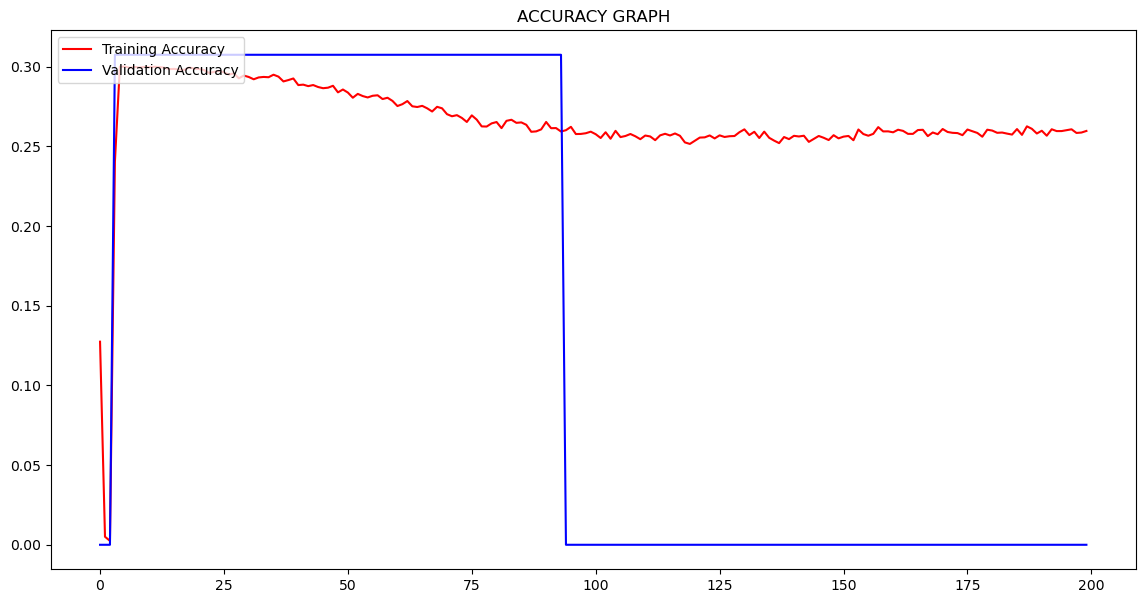

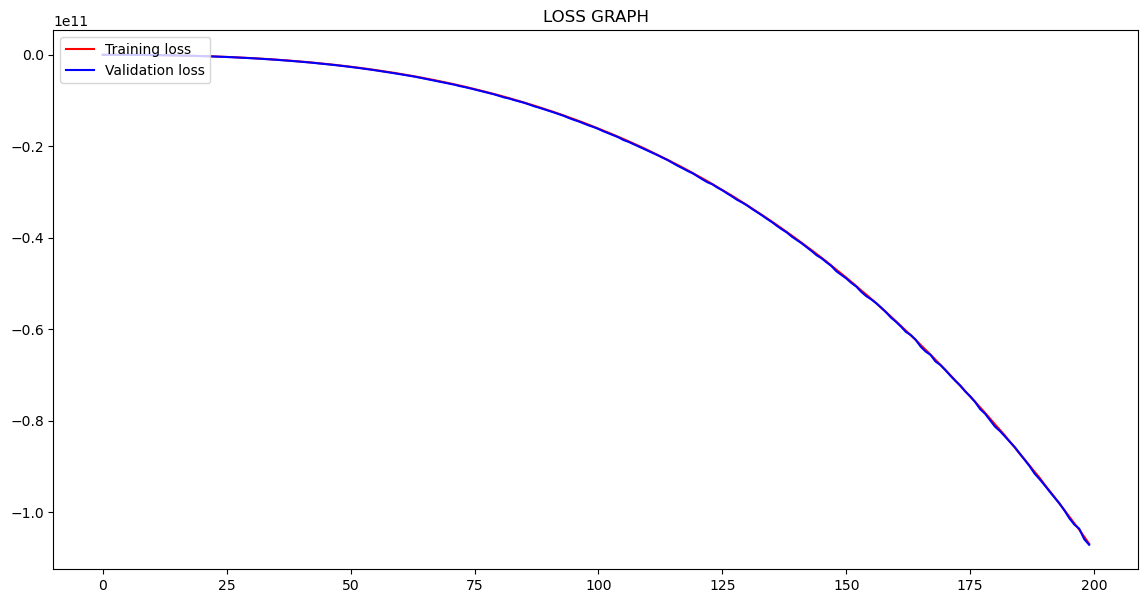

In [20]:
eval_graph(CNN_results_1)

In [21]:
Y_test1

60602   -1
50844   -1
47479    1
17790   -1
76139    1
        ..
76924    1
14846    1
79072   -1
12569   -1
70988    1
Name: result, Length: 17185, dtype: int64

538/538 [==============================] - 1s 2ms/step


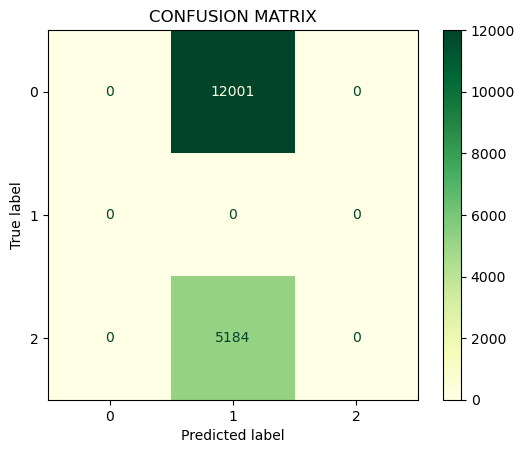

In [22]:
conf_matrix(X_test1,Y_test1,CNN_model1)

In [40]:
# X_train1,X_test1,Y_train1,Y_test1
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train1)
X_train1

array([[[1],
        [1],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [0],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [0],
        ...,
        [1],
        [1],
        [1]]])

In [23]:
# CNN LSTM MODEL
def CNN_LSTM(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.LSTM(128,return_sequences=True))
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_LSTM_model1 = CNN_LSTM(input_size1)
CNN_LSTM_model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 9, 16)             64        
                                                                 
 dropout_14 (Dropout)        (None, 9, 16)             0         
                                                                 
 batch_normalization_10 (Bat  (None, 9, 16)            64        
 chNormalization)                                                
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 5, 16)            0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 5, 32)             1568      
                                                                 
 dropout_15 (Dropout)        (None, 5, 32)            

In [24]:
# CNN_LSTM MODEL ON FIRST DATASET
CNN_LSTM_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_1 = CNN_LSTM_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
430/430 [==============================] - ETA: 0s - loss: -85291.0078 - accuracy: 0.0154
Epoch 1: val_loss improved from inf to -358125.59375, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 12s 19ms/step - loss: -85291.0078 - accuracy: 0.0154 - val_loss: -358125.5938 - val_accuracy: 0.3075
Epoch 2/200
427/430 [============================>.] - ETA: 0s - loss: -1374650.5000 - accuracy: 0.2522
Epoch 2: val_loss improved from -358125.59375 to -2913601.50000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 8s 19ms/step - loss: -1383777.1250 - accuracy: 0.2524 - val_loss: -2913601.5000 - val_accuracy: 0.3075
Epoch 3/200
430/430 [==============================] - ETA: 0s - loss: -5780563.5000 - accuracy: 0.2699
Epoch 3: val_loss improved from -2913601.50000 to -9265868.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 8s 18ms

430/430 [==============================] - 12s 28ms/step - loss: -1433361024.0000 - accuracy: 0.2722 - val_loss: -1501987840.0000 - val_accuracy: 0.3075
Epoch 23/200
429/430 [============================>.] - ETA: 0s - loss: -1604922752.0000 - accuracy: 0.2743
Epoch 23: val_loss improved from -1501987840.00000 to -1676838784.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 12s 28ms/step - loss: -1605096448.0000 - accuracy: 0.2742 - val_loss: -1676838784.0000 - val_accuracy: 0.3075
Epoch 24/200
430/430 [==============================] - ETA: 0s - loss: -1787372544.0000 - accuracy: 0.2737
Epoch 24: val_loss improved from -1676838784.00000 to -1863707904.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 17s 39ms/step - loss: -1787372544.0000 - accuracy: 0.2737 - val_loss: -1863707904.0000 - val_accuracy: 0.3075
Epoch 25/200
428/430 [============================>.] - ETA: 0s - los

Epoch 44/200
430/430 [==============================] - ETA: 0s - loss: -8455928832.0000 - accuracy: 0.2730
Epoch 44: val_loss improved from -8126330368.00000 to -8621988864.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 9s 21ms/step - loss: -8455928832.0000 - accuracy: 0.2730 - val_loss: -8621988864.0000 - val_accuracy: 0.3075
Epoch 45/200
428/430 [============================>.] - ETA: 0s - loss: -8966831104.0000 - accuracy: 0.2737
Epoch 45: val_loss improved from -8621988864.00000 to -9135928320.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 10s 22ms/step - loss: -8967031808.0000 - accuracy: 0.2737 - val_loss: -9135928320.0000 - val_accuracy: 0.3075
Epoch 46/200
430/430 [==============================] - ETA: 0s - loss: -9507324928.0000 - accuracy: 0.2730
Epoch 46: val_loss improved from -9135928320.00000 to -9669469184.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_

Epoch 65/200
430/430 [==============================] - ETA: 0s - loss: -23641278464.0000 - accuracy: 0.2725
Epoch 65: val_loss improved from -22903801856.00000 to -23862513664.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 10s 24ms/step - loss: -23641278464.0000 - accuracy: 0.2725 - val_loss: -23862513664.0000 - val_accuracy: 0.3075
Epoch 66/200
430/430 [==============================] - ETA: 0s - loss: -24611358720.0000 - accuracy: 0.2739
Epoch 66: val_loss improved from -23862513664.00000 to -24845117440.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 10s 22ms/step - loss: -24611358720.0000 - accuracy: 0.2739 - val_loss: -24845117440.0000 - val_accuracy: 0.3075
Epoch 67/200
428/430 [============================>.] - ETA: 0s - loss: -25600792576.0000 - accuracy: 0.2731
Epoch 67: val_loss improved from -24845117440.00000 to -25853341696.00000, saving model to CNN_LSTM_MOD

Epoch 86/200
429/430 [============================>.] - ETA: 0s - loss: -50033774592.0000 - accuracy: 0.2734
Epoch 86: val_loss improved from -48782925824.00000 to -50340843520.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 17s 38ms/step - loss: -50035523584.0000 - accuracy: 0.2734 - val_loss: -50340843520.0000 - val_accuracy: 0.3075
Epoch 87/200
430/430 [==============================] - ETA: 0s - loss: -51677626368.0000 - accuracy: 0.2731
Epoch 87: val_loss improved from -50340843520.00000 to -51931127808.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 15s 36ms/step - loss: -51677626368.0000 - accuracy: 0.2731 - val_loss: -51931127808.0000 - val_accuracy: 0.3075
Epoch 88/200
429/430 [============================>.] - ETA: 0s - loss: -53326426112.0000 - accuracy: 0.2728
Epoch 88: val_loss improved from -51931127808.00000 to -53554884608.00000, saving model to CNN_LSTM_MOD

Epoch 107/200
429/430 [============================>.] - ETA: 0s - loss: -90768211968.0000 - accuracy: 0.2727
Epoch 107: val_loss improved from -88652587008.00000 to -90949550080.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 16s 36ms/step - loss: -90740555776.0000 - accuracy: 0.2729 - val_loss: -90949550080.0000 - val_accuracy: 0.3075
Epoch 108/200
429/430 [============================>.] - ETA: 0s - loss: -93023133696.0000 - accuracy: 0.2737
Epoch 108: val_loss improved from -90949550080.00000 to -93282459648.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 16s 38ms/step - loss: -93030645760.0000 - accuracy: 0.2737 - val_loss: -93282459648.0000 - val_accuracy: 0.3075
Epoch 109/200
430/430 [==============================] - ETA: 0s - loss: -95353700352.0000 - accuracy: 0.2730
Epoch 109: val_loss improved from -93282459648.00000 to -95657771008.00000, saving model to CNN_LS

430/430 [==============================] - 16s 38ms/step - loss: -145196515328.0000 - accuracy: 0.2732 - val_loss: -145390272512.0000 - val_accuracy: 0.3075
Epoch 128/200
429/430 [============================>.] - ETA: 0s - loss: -148651212800.0000 - accuracy: 0.2734
Epoch 128: val_loss improved from -145390272512.00000 to -148563460096.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 15s 35ms/step - loss: -148644446208.0000 - accuracy: 0.2734 - val_loss: -148563460096.0000 - val_accuracy: 0.3075
Epoch 129/200
430/430 [==============================] - ETA: 0s - loss: -151843946496.0000 - accuracy: 0.2734
Epoch 129: val_loss improved from -148563460096.00000 to -151782850560.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 15s 34ms/step - loss: -151843946496.0000 - accuracy: 0.2734 - val_loss: -151782850560.0000 - val_accuracy: 0.3075
Epoch 130/200
430/430 [==================

430/430 [==============================] - ETA: 0s - loss: -221851664384.0000 - accuracy: 0.2736
Epoch 148: val_loss improved from -217715064832.00000 to -221843488768.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 17s 39ms/step - loss: -221851664384.0000 - accuracy: 0.2736 - val_loss: -221843488768.0000 - val_accuracy: 0.3075
Epoch 149/200
430/430 [==============================] - ETA: 0s - loss: -225970143232.0000 - accuracy: 0.2734
Epoch 149: val_loss improved from -221843488768.00000 to -226022129664.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 18s 42ms/step - loss: -225970143232.0000 - accuracy: 0.2734 - val_loss: -226022129664.0000 - val_accuracy: 0.3075
Epoch 150/200
429/430 [============================>.] - ETA: 0s - loss: -230428016640.0000 - accuracy: 0.2746
Epoch 150: val_loss improved from -226022129664.00000 to -230251364352.00000, saving model to CNN_LST

430/430 [==============================] - 8s 19ms/step - loss: -316525182976.0000 - accuracy: 0.2735 - val_loss: -315580940288.0000 - val_accuracy: 0.3075
Epoch 169/200
429/430 [============================>.] - ETA: 0s - loss: -321757052928.0000 - accuracy: 0.2738
Epoch 169: val_loss improved from -315580940288.00000 to -320855146496.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 9s 20ms/step - loss: -321777106944.0000 - accuracy: 0.2738 - val_loss: -320855146496.0000 - val_accuracy: 0.3075
Epoch 170/200
429/430 [============================>.] - ETA: 0s - loss: -326903922688.0000 - accuracy: 0.2722
Epoch 170: val_loss improved from -320855146496.00000 to -326176112640.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 9s 21ms/step - loss: -326854770688.0000 - accuracy: 0.2723 - val_loss: -326176112640.0000 - val_accuracy: 0.3075
Epoch 171/200
429/430 [=====================

428/430 [============================>.] - ETA: 0s - loss: -440068964352.0000 - accuracy: 0.2733
Epoch 189: val_loss improved from -432222175232.00000 to -438702997504.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 9s 20ms/step - loss: -440038227968.0000 - accuracy: 0.2734 - val_loss: -438702997504.0000 - val_accuracy: 0.3075
Epoch 190/200
428/430 [============================>.] - ETA: 0s - loss: -446599856128.0000 - accuracy: 0.2729
Epoch 190: val_loss improved from -438702997504.00000 to -445239787520.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 8s 19ms/step - loss: -446612504576.0000 - accuracy: 0.2730 - val_loss: -445239787520.0000 - val_accuracy: 0.3075
Epoch 191/200
429/430 [============================>.] - ETA: 0s - loss: -453227151360.0000 - accuracy: 0.2738
Epoch 191: val_loss improved from -445239787520.00000 to -451841982464.00000, saving model to CNN_LSTM_

538/538 [==============================] - 2s 3ms/step - loss: -518573817856.0000 - accuracy: 0.3017


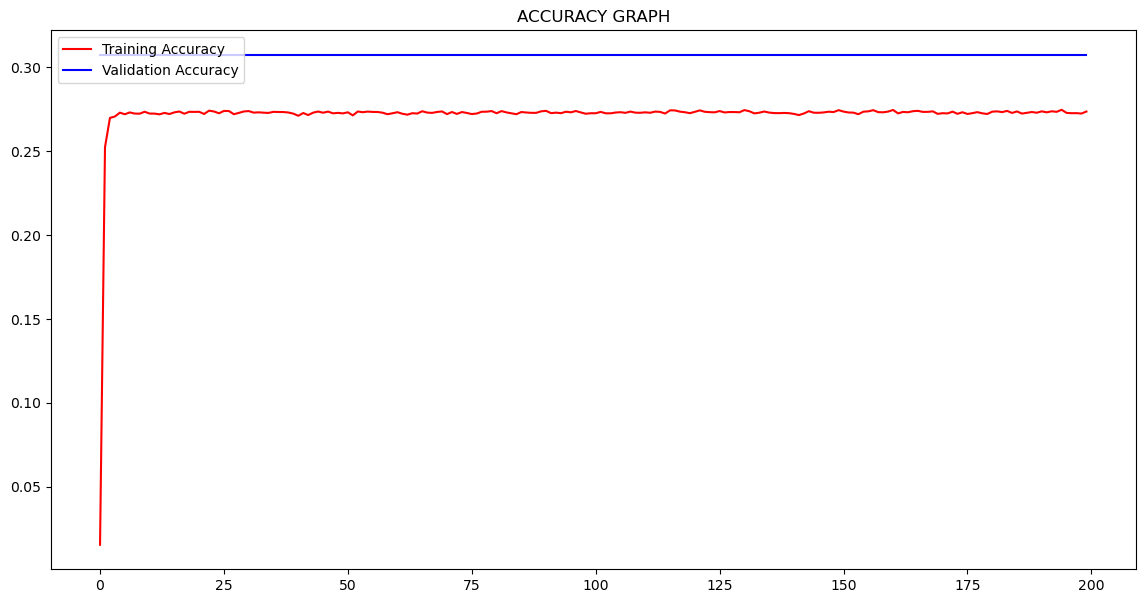

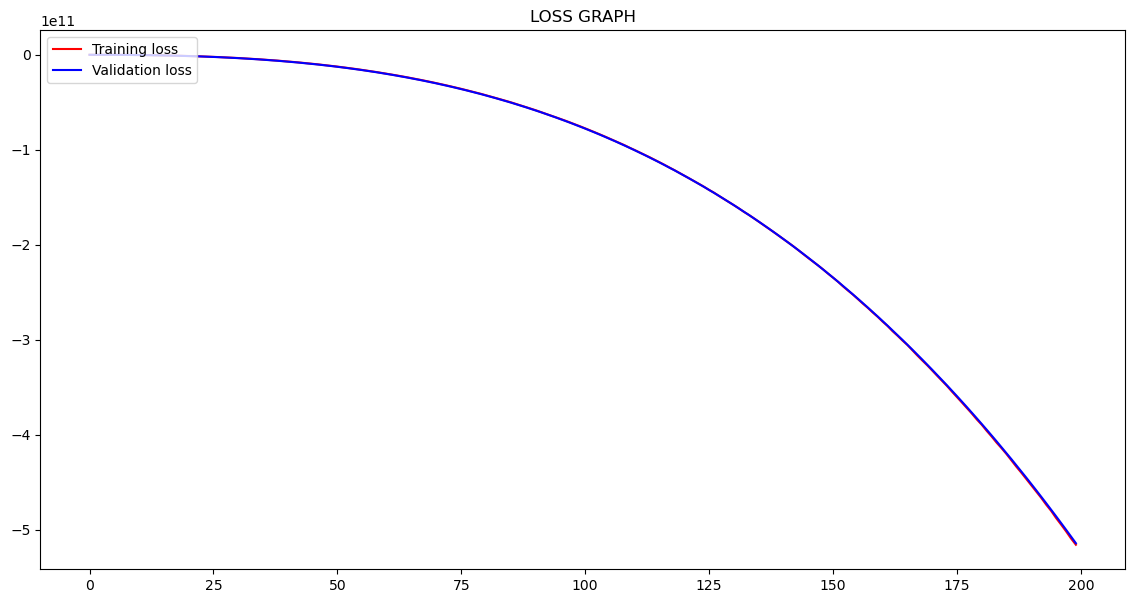

538/538 [==============================] - 3s 3ms/step


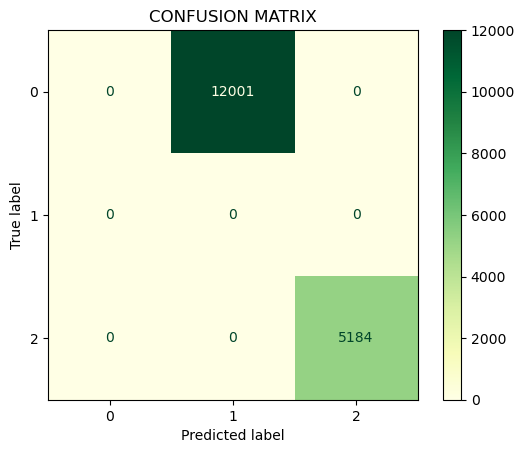

In [25]:
CNN_LSTM_model1.evaluate(X_test1,Y_test1)
eval_graph(CNN_LSTM_results_1)
conf_matrix(X_test1,Y_test1,CNN_LSTM_model1)

In [46]:
model_architecture = CNN_LSTM_model1.to_json()
with open('./modal/CNN_LSTM_contentv1_0.json', 'w') as json_file:
    json_file.write(model_architecture)

In [47]:
model_architecture = CNN_model1.to_json()
with open('./modal/CNN_contentv1_0.json', 'w') as json_file:
    json_file.write(model_architecture)